__4.10 Coding Etiquete & Excell Reporting 1__

In [1]:
#importing library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

__1. Importing the data set from Task 4.9__

In [2]:
ords_prods_custs_merged = pd.read_pickle(r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cust(4.9).pkl')

In [3]:
ords_prods_custs_merged.shape

(32641268, 32)

In [4]:
ords_prods_custs_merged.head(1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
#ok been avoiding this :-) time to finally rename order_dow
ords_prods_custs_merged = ords_prods_custs_merged.rename (columns = {'order_dow': 'order_day_of_week'})

__2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.__

There's 1 collumn that is not comforming the PII data, these are the column 'surname', in this case we need to create a new data set without this particular column.

In [6]:
ords_prods_custs_merged_2 = ords_prods_custs_merged.drop(columns =['surname'] )

In [7]:
#let's give our new data set a peek if it is now accoring to the PII data
ords_prods_custs_merged_2.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,...,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,...,20,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


__3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.__

In [8]:
# Check state names and value counts
ords_prods_custs_merged_2['state'].value_counts(dropna = False)

Pennsylvania            671781
California              664472
Rhode Island            661705
Georgia                 661136
New Mexico              659231
Arizona                 658597
North Carolina          656372
Oklahoma                656318
Alaska                  653070
Minnesota               652467
Massachusetts           651063
Wyoming                 648970
Virginia                646146
Missouri                645366
Texas                   645094
Colorado                643864
Maine                   643218
North Dakota            643040
Alabama                 642694
Louisiana               642222
Kansas                  642064
Delaware                641521
South Carolina          641466
Oregon                  641009
Arkansas                640781
New York                640750
Nevada                  640740
Montana                 639881
South Dakota            638405
Illinois                637520
Hawaii                  637490
Washington              637488
Mississi

__3.1 Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).__

In [9]:
#create Region
result = []

for value in ords_prods_custs_merged_2['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts ') or (value == 'Rhode Island ') or (value == 'Connecticut') or (value == 'New York') or (value == 
    'Pennsylvania') or (value =='New Jersey'): result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):result.append('Midwest')
    elif (value == 'Deleware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):result.append('South')
    else:
        result.append ('West')

In [10]:
#checking result
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [11]:
# Create new column within dataframe and set it equal to result
ords_prods_custs_merged_2['region'] = result

In [12]:
ords_prods_custs_merged_2['region'].value_counts(dropna = False)

West         10307471
South        10229198
Midwest       7652535
Northeast     4452064
Name: region, dtype: int64

Confirming the number of region as in __32.641.268__

In [13]:
ords_prods_custs_merged_2.shape

(32641268, 32)

it matches!!

__3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)__

In [14]:
#creating crosstab
crosstab = pd.crosstab(ords_prods_custs_merged_2['region'], ords_prods_custs_merged_2['spending_flag'], dropna = False)

In [15]:
#checking crosstab
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,84446,4367618
South,194955,10034243
West,203252,10104219


In [ ]:
crosstab.to_clipboard()

There isn't a significant different of spending_flag between the 4 region, there is an average of 1.9 % - 2% of total customer could be considered a high spender in every region, Instacart have the most customer in South and West Region.

__4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.__

In [16]:
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['max_order'] < 5, 'exclusion_flag'] = 'low activity customer'

In [17]:
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['max_order'] >= 5, 'exclusion_flag'] = 'non low activity customer'

In [18]:
ords_prods_custs_merged_2['exclusion_flag'].value_counts(dropna = False)

non low activity customer    31929979
low activity customer          711289
Name: exclusion_flag, dtype: int64

In [19]:
ords_prods_custs_merged_2.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,aisle_id,department_id,prices,max_order,spending,frequency,age,n_dependants,income
count,3.264127e+07,3.264127e+07,3.264127e+07,3.264127e+07,3.264127e+07,30563166.0,3.243506e+07,32435059.0,32404859.0,32404859.0,3.239973e+07,3.264127e+07,3.264127e+07,3.264127e+07,3.264127e+07,3.264127e+07,3.264127e+07
mean,1.710718e+06,1.029383e+05,1.713846e+01,2.739037e+00,1.342599e+01,NaN,2.557635e+04,NaN,NaN,NaN,7.605033e+00,3.394200e+01,NaN,1.043189e+01,4.946535e+01,1.501864e+00,9.940516e+04
std,9.873084e+05,5.946689e+04,1.752959e+01,2.090267e+00,4.246218e+00,0.0,1.409657e+04,0.0,0.0,0.0,4.100321e+00,2.514805e+01,NaN,7.158117e+00,1.848552e+01,1.118866e+00,4.305343e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.0,1.0,1.0,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.558848e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.353200e+04,3.0,31.0,4.0,4.199219e+00,1.400000e+01,7.386719e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.697900e+04
50%,1.710984e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.525600e+04,6.0,83.0,9.0,7.398438e+00,2.700000e+01,7.824219e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.659500e+04
75%,2.565489e+06,1.543940e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.793500e+04,11.0,107.0,16.0,1.129688e+01,4.800000e+01,8.257812e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.278650e+05
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,30.0,4.968800e+04,145.0,134.0,21.0,2.500000e+01,1.000000e+02,2.500800e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [20]:
#subset data set with only low activity customer
df_low_activity_cust = ords_prods_custs_merged_2[ords_prods_custs_merged_2['exclusion_flag']=='low activity customer']

In [21]:
#checking the value of 'max_order' to confirm that it is under 5
df_low_activity_cust['max_order'].value_counts(dropna = False)

4    711289
Name: max_order, dtype: int64

In [22]:
#creating another subset with only non low activity customers
df_non_low_activity_cust = ords_prods_custs_merged_2[ords_prods_custs_merged_2['exclusion_flag']=='non low activity customer']

In [23]:
#checking if we have created the correct data set
df_non_low_activity_cust['max_order'].value_counts(dropna = False).sort_index()

5       773857
6       810010
7       825922
8       816445
9       822821
        ...   
96       59965
97       40523
98       45019
99       44651
100    1173687
Name: max_order, Length: 96, dtype: int64

In [24]:
#creating path
path = r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis'

In [25]:
#checking if it has been created succesfully
path

'/Users/rayruslijunior/11-2021 Instacart Basket Analysis'

In [28]:
#exporting subset for low activity customer
df_low_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'low_Activity_customer.pkl'))

In [ ]:
#exporting subset for non low activity customer
df_non_low_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','non_low_activity_cust.pkl'))

__5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)__

__5.1 Definining age group__

In [29]:
#checking age range in our dataset
ords_prods_custs_merged_2['age'].value_counts(dropna = False).sort_index()

18    504085
19    523536
20    506558
21    516217
22    517624
       ...  
77    505908
78    498941
79    533539
80    518854
81    513068
Name: age, Length: 64, dtype: int64

In [32]:
#I guess we could create a new collumn by age_group to make things easier for us to analyze

age_group = []

for value in ords_prods_custs_merged_2['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value > 30) and (value <= 40):
        age_group.append('31-40')
    elif (value > 40) and (value <= 50):
        age_group.append('41-50')
    elif (value > 50) and (value <= 60):
        age_group.append('51-60')
    elif (value > 60) and (value <= 70):
        age_group.append('61-70')
    elif (value > 70) and (value <= 80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 82):
        age_group.append('80+')    
    else:
        result.append('undefined')

In [33]:
# Create new age_group column set it equal to age_group
ords_prods_custs_merged_2['age_group'] = age_group

In [34]:
#perfect :-) we got it!!
ords_prods_custs_merged_2['age_group'].value_counts(dropna=False).sort_index()

18-20    1534179
21-30    5113481
31-40    5107167
41-50    5129198
51-60    5097171
61-70    5041406
71-80    5105598
80+       513068
Name: age_group, dtype: int64

__5.2 Defining Income Range__

In [35]:
ords_prods_custs_merged_2['income'].value_counts(dropna=False).sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: income, Length: 108012, dtype: int64

In [36]:
#Let's create an income_range based on the United States taxation system 
income = []

for value in ords_prods_custs_merged_2['income']:
    if value <= 25000:income.append('0 - 025000')
    elif (value > 25000) and (value<= 40000):income.append('025000 - 040000')
    elif (value > 40000) and (value <= 80000):income.append('040000 - 080000')
    elif (value > 80000) and (value <= 120000):income.append('080000 - 120000')
    elif (value > 120000) and (value <= 160000):income.append('120000 - 160000')
    elif (value > 160000) and (value <= 210000):income.append('160000 - 210000')
    elif (value > 210000) and (value <= 523000): income.append('210000 - 523000')
    elif (value > 523000): income.append('over 523000')
    else: income.append('other')

In [37]:
#creating a new column 'income_range' in our dataset (equals income)
ords_prods_custs_merged_2['income_range'] = income

In [38]:
#checking the value of our income_range column
ords_prods_custs_merged_2['income_range'].value_counts(dropna = False).sort_index()

025000 - 040000     1746209
040000 - 080000     9922631
080000 - 120000    11336593
120000 - 160000     7412983
160000 - 210000     1978622
210000 - 523000      229572
over 523000           14658
Name: income_range, dtype: int64

__5.3 defining our customer based on their number of dependents - categorizing to 'non parent' and 'parent'__

In [39]:
#checking family status
ords_prods_custs_merged_2['fam_status'].value_counts(dropna = False).sort_index()

divorced/widowed                     2792100
living with parents and siblings     1561916
married                             22922405
single                               5364847
Name: fam_status, dtype: int64

In [40]:
#checking number of dependants to categorize them by parent and non parent
ords_prods_custs_merged_2['n_dependants'].value_counts(dropna = False).sort_index()

0    8156947
1    8139996
2    8150216
3    8194109
Name: n_dependants, dtype: int64

In [41]:
#creating new column based on the number of dependants
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['n_dependants'] == 0,'parental_status'] = 'non parent'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['n_dependants'] >= 1,'parental_status'] = 'parent'

In [42]:
#checking our new column
ords_prods_custs_merged_2['parental_status'].value_counts(dropna = False)

parent        24484321
non parent     8156947
Name: parental_status, dtype: int64

__5.4 Now its turn to get a more clearer day of the week__

In [43]:
ords_prods_custs_merged_2['order_day_of_week'].value_counts(dropna = False).sort_index()

0    6252941
1    5696724
2    4243173
3    3868747
4    3812390
5    4236989
6    4530304
Name: order_day_of_week, dtype: int64

In [44]:
#creating day column with loc function
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 0,'day'] = 'Saturday'
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 1,'day'] = 'Sunday'
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 2,'day'] = 'Monday'
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 3,'day'] = 'Tuesday'
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 4,'day'] = 'Wednesday'
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 5,'day'] = 'Thursday'
ords_prods_custs_merged_2.loc [ords_prods_custs_merged_2['order_day_of_week'] == 6,'day'] = 'Friday'

In [45]:
#checking our new 'day' column
ords_prods_custs_merged_2['day'].value_counts(dropna = False)

Saturday     6252941
Sunday       5696724
Friday       4530304
Monday       4243173
Thursday     4236989
Tuesday      3868747
Wednesday    3812390
Name: day, dtype: int64

__5.5 Combining & Defining the order_hour_of_day__

In [46]:
#checking what is inside this column
ords_prods_custs_merged_2['order_hour_of_day'].value_counts(dropna = False).sort_index()


0      220337
1      116589
2       69904
3       51675
4       53636
5       88661
6      292533
7      897163
8     1729871
9     2471067
10    2781009
11    2755369
12    2637533
13    2680171
14    2709084
15    2682090
16    2554110
17    2104225
18    1649870
19    1268365
20     983232
21     801052
22     638671
23     405051
Name: order_hour_of_day, dtype: int64

I will create a new column based on the definition of morning (5 - 12), afternoon(12-17),evening(17-21), night (21 - 4)

In [47]:
result = []

for value in ords_prods_custs_merged_2['order_hour_of_day']:
    if value < 12 and (value>=5): 
        result.append('Morning')
    elif (value >= 12) and (value < 17):
        result.append('Afternoon')
    elif (value >= 17) and (value <= 21):
        result.append('Evening')
    else: 
        result.append('Night')

In [48]:
result

['Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 '

In [49]:
#Adding a new column with part_of_day
ords_prods_custs_merged_2 ['part_of_day'] = result

In [50]:
#checking value
ords_prods_custs_merged_2 ['part_of_day'].value_counts(dropna= False)

Afternoon    13262988
Morning      11015673
Evening       6806744
Night         1555863
Name: part_of_day, dtype: int64

In [51]:
#we need to give name for the department_id column - for this we need to import departments column
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Original Data','departments.csv'))

In [52]:
#Checking our dep 
df_dept.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [53]:
#transposing the data
df_dept.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [54]:
# Creating new column for department names 
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 1, 'department_name'] = 'frozen'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 2, 'department_name'] = 'other'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 3, 'department_name'] = 'bakery'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 4, 'department_name'] = 'produce'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 5, 'department_name'] = 'alcohol'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 6, 'department_name'] = 'international'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 7, 'department_name'] = 'beverages'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 8, 'department_name'] = 'pets'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 9, 'department_name'] = 'dry good pasta'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 10, 'department_name'] = 'bulk'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 11, 'department_name'] = 'personal care'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 12, 'department_name'] = 'meat seafood'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 13, 'department_name'] = 'pantry'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 14, 'department_name'] = 'breakfast'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 15, 'department_name'] = 'canned goods'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 16, 'department_name'] = 'dairy eggs'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 17, 'department_name'] = 'household'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 18, 'department_name'] = 'babies'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 19, 'department_name'] = 'snacks'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 20, 'department_name'] = 'deli'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 21, 'department_name'] = 'missing'



In [55]:
ords_prods_custs_merged_2['department_name'].value_counts()

produce           9479291
dairy eggs        5398747
snacks            2887550
beverages         2688123
frozen            2234743
pantry            1875369
bakery            1172428
canned goods      1068058
deli              1051249
dry good pasta     866627
household          738666
meat seafood       708927
breakfast          703033
personal care      447572
babies             423802
international      269253
alcohol            153696
pets                97716
missing             69145
other               36291
bulk                34573
Name: department_name, dtype: int64

In [56]:
#checking how much revenue from each department were generated for instacart 
dept_sales = ords_prods_custs_merged_2.groupby('department_name').agg({'prices': ['sum']})

In [57]:
dept_sales

,prices
,sum
department_name,
alcohol,1.251650e+06
babies,3.237144e+06
bakery,9.207895e+06
beverages,2.064572e+07
breakfast,5.644788e+06
bulk,2.886450e+05
canned goods,8.053212e+06
dairy eggs,4.495542e+07


Text(108.68, 0.5, '')

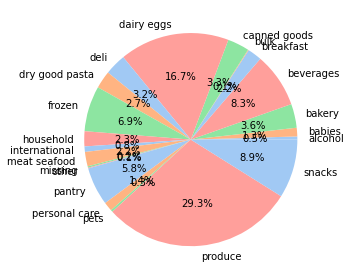

In [58]:
pie_department_name = ords_prods_custs_merged_2['department_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('pastel', 4))
plt.tight_layout()
plt.ylabel('')

this chart shown that 75,9 % of Instacart revenue are generated from 6 departments: Produce (29,3%),Dairy Eggs (16.7%), Snacks (8,9%), Beverage (8,3%) ,Frozen (6.9%), Pantry (5.8%) 

In [59]:
# Write for loop to flag to create new department_performance column

result = []

for value in ords_prods_custs_merged_2['department_id']:
    if value == 1:
        result.append('High performing dept')
    elif value == 4:
        result.append('High performing dept')
    elif value == 7:
        result.append('High performing dept')
    elif value == 13:
        result.append('High performing dept')
    elif value == 16:
        result.append('High performing dept')
    elif value == 19:
        result.append('High performing dept')
    else:
        result.append('Normal performing dept')

In [60]:
result

['High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'High performing dept',
 'High performing

In [61]:
#creating new collumn
ords_prods_custs_merged_2['department_performance'] = result

In [62]:
ords_prods_custs_merged_2['department_performance'].value_counts()

High performing dept      24563823
Normal performing dept     8077445
Name: department_performance, dtype: int64

In [78]:
#exporting this good old data since this notebook has been a little bit too sluggish
ords_prods_custs_merged_2.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_custs_merged_2.pkl'))